<h1> <center> ETL

se importan las librerias a usar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#carga los df 
df_homicidios = pd.read_excel('archivos/homicidios.xlsx')
df_hom_victimas = pd.read_excel('archivos/homicidios.xlsx',sheet_name=2)


In [3]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


 Las columnas contienen:
- ID                       identificador unico del siniestro
- N_VICTIMAS               cantidad de víctimas
- FECHA                    fecha en formato dd/mm/aaaa
- AAAA                     año
- MM                       mes
- DD                       día del mes
- HORA                     hora del siniestro
- HH                       franja horaria entera
- LUGAR_DEL_HECHO          Dirección del hecho
- TIPO_DE_CALLE            Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
- Calle                    nombre de la arteria donde se produjo el hecho
- Altura                   altura de la arteria donde se produjo el hecho
- Cruce                    cruce en caso de que sea una encrucijada
- Dirección Normalizada    direccion en formato normalizado USIG
- COMUNA                   Comuna de la ciudad (1 a 15)
- XY (CABA)                geocodificación plana
- pos x                    longitud con separador punto. WGS84
- pos y                    latitud con separador punto. WGS84
- PARTICIPANTES            conjunción de víctima y acusado
- VICTIMA                  Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
- ACUSADO                  Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal


 
 
 - se procede a eliminar las columnas AAAA	MM	DD, ya que indica la fecha y son irrelevantes.
 - se elimina la columna hora, ya que existe la columna HH que servirá para un futuro analisis (se vuelven repetitivas)
 - se eliminaran las columnas  LUGAR_DEL_HECHO, Calle,	Altura,	Cruce,	Dirección Normalizada, XY (CABA), ya que no serán necesarios usarlos

In [4]:
df_homicidios = df_homicidios.drop(['AAAA', 'MM', 'DD', 'HORA', 'LUGAR_DEL_HECHO', 
                                    'Calle', 'Altura', 'Cruce', 'Dirección Normalizada', 'XY (CABA)'] ,axis=1)
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_hom_victimas.head(10)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


- Se visualiza en df_hom_victimas que hay dos fechas, del incidente y de la muerte de la victima, por lo que se procede a eliminar columna FECHA_FALLECIMIENTO, ya que es un dato irrelevante.
- se procede a eliminar las columnas AAAA	MM	DD, ya que indica la fecha y son irrelevantes.

In [6]:
df_hom_victimas = df_hom_victimas.drop(['AAAA', 'MM', 'DD', 'FECHA_FALLECIMIENTO'] ,axis=1)
df_hom_victimas.head(10) 

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29
5,2016-0008,2016-01-24,CONDUCTOR,MOTO,MASCULINO,30
6,2016-0009,2016-01-24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29
7,2016-0010,2016-01-29,CONDUCTOR,MOTO,MASCULINO,18
8,2016-0012,2016-02-08,CONDUCTOR,MOTO,MASCULINO,22
9,2016-0013,2016-02-10,PEATON,PEATON,MASCULINO,16


se puede observar que hay similitud en las tablas en ID, se realizará un merged para completar los valores faltantes para un posterior analisis

In [7]:
df_fusionado = pd.merge(left=df_homicidios, right=df_hom_victimas, left_on="ID", right_on="ID_hecho", how="inner")
df_fusionado

,ID,N_VICTIMAS,FECHA_x,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD
0,2016-0001,1,2016-01-01,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,1,2016-01-02,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,1,2016-01-03,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,1,2016-01-10,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,1,2016-01-21,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
713,2021-0094,1,2021-12-20,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
714,2021-0095,1,2021-12-30,0,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27
715,2021-0096,1,2021-12-15,10,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,2021-0096,2021-12-15,CONDUCTOR,AUTO,MASCULINO,60


se procede a eliminar la fecha_y, ID_hecho, VICTIMA_y. ya que se repiten

In [8]:
df_fusionado = df_fusionado.drop(['FECHA_y', 'ID_hecho', 'VICTIMA_y'] ,axis=1)
df_fusionado.head(10) 

,ID,N_VICTIMAS,FECHA_x,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016-01-01,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29
5,2016-0008,1,2016-01-24,18,AVENIDA,8,-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,CONDUCTOR,MASCULINO,30
6,2016-0009,1,2016-01-24,19,CALLE,11,-58.50095869,-34.60825440,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,29
7,2016-0010,1,2016-01-29,15,GRAL PAZ,9,-58.50877521,-34.66977709,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,18
8,2016-0012,1,2016-02-08,1,AVENIDA,1,-58.38048577,-34.61303893,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,22
9,2016-0013,1,2016-02-10,11,AVENIDA,1,-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO,PEATON,MASCULINO,16


In [9]:
df_fusionado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'HH', 'TIPO_DE_CALLE', 'COMUNA', 'pos x',
       'pos y', 'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ROL', 'SEXO',
       'EDAD'],
      dtype='object')

se procede a revisar los valores unicos de las variables categorizadas

In [10]:
#deberia arrojar valores de 0 a 23 ya que es una hora
df_fusionado['HH'].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

In [11]:
#se observo 'SD' por lo que se reemplazara por nulo
df_fusionado['HH'] = df_fusionado['HH'].replace('SD', None)

# Convertir la columna 'HH' a valores enteros con int32
df_fusionado['HH'] = pd.to_numeric(df_fusionado['HH'], errors='coerce', downcast='integer').astype('Int32')



In [12]:
df_fusionado['TIPO_DE_CALLE'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [13]:
df_fusionado['COMUNA'].unique()

array([ 8,  9,  1, 11, 15,  4,  7, 12,  3, 13, 14, 10,  6,  2,  5,  0],
      dtype=int64)

In [14]:
df_fusionado['PARTICIPANTES'].unique()

array(['MOTO-AUTO', 'AUTO-PASAJEROS', 'MOTO-SD', 'MOTO-PASAJEROS',
       'MOTO-OBJETO FIJO', 'MOTO-CARGAS', 'PEATON-AUTO', 'PEATON-MOTO',
       'PEATON-PASAJEROS', 'AUTO-AUTO', 'AUTO-OBJETO FIJO',
       'PEATON-CARGAS', 'MOTO-MOTO', 'MULTIPLE', 'SD-SD', 'AUTO-CARGAS',
       'AUTO-SD', 'MOTO-MOVIL', 'CARGAS-CARGAS', 'PEATON-SD',
       'BICICLETA-CARGAS', 'SD-CARGAS', 'BICICLETA-PASAJEROS',
       'PASAJEROS-PASAJEROS', 'MOVIL-PASAJEROS', 'CARGAS-OBJETO FIJO',
       'PEATON-BICICLETA', 'SD-AUTO', 'CARGAS-AUTO', 'BICICLETA-AUTO',
       'MOTO-BICICLETA', 'SD-MOTO', 'MOVIL-CARGAS', 'PASAJEROS-AUTO',
       'AUTO-MOVIL', 'CARGAS-PASAJEROS', 'BICICLETA-TREN',
       'BICICLETA-OTRO', 'MOTO-OTRO', 'PEATON_MOTO-MOTO', 'PASAJEROS-SD'],
      dtype=object)

In [15]:
df_fusionado['VICTIMA_x'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [16]:
df_filtrado = df_fusionado[df_fusionado['VICTIMA_x'].str.contains('PEATON_MOTO')]
df_filtrado


,ID,N_VICTIMAS,FECHA_x,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
602,2020-0063,2,2020-12-05,7,CALLE,11,-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PEATON,MASCULINO,38
603,2020-0063,2,2020-12-05,7,CALLE,11,-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PASAJERO_ACOMPAÑANTE,MASCULINO,21


se puede observar que hay un error de transcripción en victima, por lo que se procede a cambiar

In [17]:
df_fusionado['VICTIMA_x'].replace('PEATON_MOTO', 'PEATON', inplace=True)


In [18]:
df_fusionado['ROL'].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

In [19]:
df_fusionado['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [20]:
df_fusionado['SEXO'].unique()

array(['MASCULINO', 'FEMENINO', 'SD'], dtype=object)

In [21]:
df_fusionado['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

In [22]:
# Reemplazar 'SD' por None en la columna 'EDAD'
df_fusionado['EDAD'] = df_fusionado['EDAD'].replace('SD', None)

# Convertir la columna 'EDAD' a valores enteros con int32
df_fusionado['EDAD'] = pd.to_numeric(df_fusionado['EDAD'], errors='coerce', downcast='integer').astype('Int32')



In [23]:
df_fusionado['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

se comprueba que todas los registros estan bien

In [51]:
df_fusionado.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             717 non-null    object        
 1   N_VICTIMAS     717 non-null    int64         
 2   FECHA_x        717 non-null    datetime64[ns]
 3   HH             716 non-null    Int32         
 4   TIPO_DE_CALLE  717 non-null    object        
 5   COMUNA         717 non-null    int64         
 6   pos x          717 non-null    object        
 7   pos y          717 non-null    object        
 8   PARTICIPANTES  717 non-null    object        
 9   VICTIMA_x      717 non-null    object        
 10  ACUSADO        717 non-null    object        
 11  ROL            717 non-null    object        
 12  SEXO           717 non-null    object        
 13  EDAD           664 non-null    Int32         
dtypes: Int32(2), datetime64[ns](1), int64(2), object(9)
memory usage: 79.8+ KB

 Se procede a guardar en csv el df_fusionado

In [53]:
df_fusionado.replace({'SD': 'sd', 'sd': 'sd', 'SD-SD': 'sd'}, regex=True, inplace=True)

In [54]:
df_fusionado.to_csv('archivos/homicidios_limpio.csv', index=False)


se leera el archivo lesiones

In [26]:
df_lesiones = pd.read_excel('archivos/lesiones.xlsx',)
df_les_victimas = pd.read_excel('archivos/lesiones.xlsx',sheet_name=2)


In [27]:
df_lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [28]:
df_lesiones.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [29]:
df_lesiones = df_lesiones.drop(['aaaa', 'mm', 'dd', 'hora', 'direccion_normalizada',
                                'otra_direccion', 'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista'] ,axis=1)
df_lesiones.head()

,id,n_victimas,fecha,franja_hora,comuna,tipo_calle,longitud,latutid,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9,14,SD,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD
1,LC-2019-0000053,1,2019-01-01 00:00:00,1,8,SD,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD
2,LC-2019-0000063,1,2019-01-01 00:00:00,2,8,SD,-58.468335,-34.677556,SD,SD,SD-SD,SD
3,LC-2019-0000079,1,2019-01-01 00:00:00,2,7,SD,-58.437425,-34.647349,PEATON,SD,PEATON-SD,SD
4,LC-2019-0000082,4,2019-01-01 00:00:00,4,3,SD,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD


In [30]:
# Convertir la columna de fechas a formato datetime
df_lesiones['fecha'] = pd.to_datetime(df_lesiones['fecha'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extraer solo la parte de fecha (año, mes, día)
df_lesiones['fecha'] = df_lesiones['fecha'].dt.date


In [31]:
df_les_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


In [32]:
df_les_victimas['VEHICULO_VICTIMA'].unique()

array(['sd', 'MOTO', 'AUTO', 'TAXI', 'PEATON', 'CICLISTA', 'SD',
       'TRANSPORTE PUBLICO', 'MOVIL', 'CAMION', 'UTILITARIO', 'MONOPATIN',
       'MIXTO', 'OTRO'], dtype=object)

se puede observar que hay similitud en las tablas en id con ID hecho, se realizará un merged

In [33]:
# Eliminar las columnas 
df_les_victimas = df_les_victimas.drop(['AAA', 'MM', 'DD', 'FECHA ', 'GRAVEDAD'], axis=1)
df_les_victimas.head()

,ID hecho,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,LC-2019-0000053,sd,Varon,57
1,LC-2019-0000063,sd,SD,SD
2,LC-2019-0000079,sd,Varon,SD
3,LC-2019-0000082,sd,Varon,45
4,LC-2019-0000082,sd,Mujer,45


In [34]:
df_consolidado = pd.merge(left=df_lesiones, right=df_les_victimas, left_on="id", right_on="ID hecho", how="inner")
df_consolidado

,id,n_victimas,fecha,franja_hora,comuna,tipo_calle,longitud,latutid,victima,acusado,participantes,gravedad,ID hecho,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,LC-2019-0000179,1,2019-01-01,9,14,SD,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,LC-2019-0000179,sd,SD,SD
1,LC-2019-0000053,1,2019-01-01,1,8,SD,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD,LC-2019-0000053,sd,Varon,57
2,LC-2019-0000063,1,2019-01-01,2,8,SD,-58.468335,-34.677556,SD,SD,SD-SD,SD,LC-2019-0000063,sd,SD,SD
3,LC-2019-0000079,1,2019-01-01,2,7,SD,-58.437425,-34.647349,PEATON,SD,PEATON-SD,SD,LC-2019-0000079,sd,Varon,SD
4,LC-2019-0000082,4,2019-01-01,4,3,SD,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD,LC-2019-0000082,sd,Varon,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021-12-31,19,9,AVENIDA,-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,LC-2021-0652865,SD,Varon,28
27594,LC-2021-0652865,2,2021-12-31,19,9,AVENIDA,-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,LC-2021-0652865,SD,Varon,52
27595,LC-2021-0652907,1,2021-12-31,20,1,SD,-58.382894,-34.583083,SD,SD,SD-SD,SD,LC-2021-0652907,SD,Varon,23
27596,LC-2021-0652921,1,2021-12-31,22,5,CALLE,-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,GRAVE,LC-2021-0652921,MOTO,Varon,31


In [35]:
df_consolidado = df_consolidado.drop(['ID hecho', 'VEHICULO_VICTIMA'], axis=1)


In [36]:
df_consolidado['comuna'].unique()

array([14, 8, 7, 3, 15, 11, 9, 1, 4, 12, 2, 5, 6, 13, 10,
       'No Especificada', nan, 'SD'], dtype=object)

In [37]:
df_consolidado.replace({'SD': 'sd', 'No Especificada': 'sd', }, regex=True, inplace=True)
df_consolidado['comuna'].unique()

array([14, 8, 7, 3, 15, 11, 9, 1, 4, 12, 2, 5, 6, 13, 10, 'sd', nan],
      dtype=object)

In [38]:
df_consolidado['franja_hora'].unique()

array([9, 1, 2, 4, 8, 7, 12, 13, 19, 18, 21, 3, 15, 14, 5, 17, 23, 10, 16,
       11, 20, 22, 0, 6, 'sd', nan], dtype=object)

In [39]:
df_consolidado['franja_hora'] = df_consolidado['franja_hora'].fillna('sd')


In [40]:
df_consolidado['tipo_calle'].unique()

array(['sd', 'AVENIDA', 'CALLE', 'GRAL PAZ', 'AUTOPISTA'], dtype=object)

In [41]:
df_consolidado['victima'].unique()

array(['CICLISTA', 'AUTO', 'sd', 'PEATON', 'MOTO', 'TRANSPORTE PUBLICO',
       'CAMIONETA', 'MOVIL', 'OTRO', 'CAMION', 'MONOPATIN', 'UTILITARIO',
       'TAXI', 'MIXTO'], dtype=object)

In [42]:
df_consolidado['SEXO'].unique()

array(['sd', 'Varon', 'Mujer', 'varon', 'mujer', 'MUJER', 'Mujer '],
      dtype=object)

In [43]:
df_consolidado['SEXO'].replace({'Varon': 'hombre', 'Mujer': 'mujer', 'varon': 'hombre', 'MUJER': 'mujer',
                                'mujer ': 'mujer'}, regex=True, inplace=True)
df_consolidado['SEXO'].unique()


array(['sd', 'hombre', 'mujer', 'mujer '], dtype=object)

In [44]:
df_consolidado['acusado'].unique()

array(['sd', 'AUTO', 'CICLISTA', 'MOVIL', 'CAMIONETA', 'MOTO', 'TAXI',
       'TRANSPORTE PUBLICO', 'CAMION', 'OBJETO FIJO', 'OTRO',
       'UTILITARIO', 'PEATON', 'MONOPATIN'], dtype=object)

Comenzamos buscando las posibles datos faltantes que pueden ser ('SD','sd','SD-SD'), los cuales se van a normalizar con sd

In [46]:
df_consolidado.replace({'SD': 'sd', 'sd': 'sd', 'SD-SD': 'sd'}, regex=True, inplace=True)


In [50]:
df_consolidado.head()

,id,n_victimas,fecha,franja_hora,comuna,tipo_calle,longitud,latutid,victima,acusado,participantes,gravedad,SEXO,EDAD_VICTIMA
0,LC-2019-0000179,1,2019-01-01,9,14,sd,-58.408911,-34.559658,CICLISTA,sd,CICLISTA-sd,sd,sd,sd
1,LC-2019-0000053,1,2019-01-01,1,8,sd,-58.44351,-34.669125,AUTO,sd,AUTO-sd,sd,hombre,57
2,LC-2019-0000063,1,2019-01-01,2,8,sd,-58.468335,-34.677556,sd,sd,sd-sd,sd,sd,sd
3,LC-2019-0000079,1,2019-01-01,2,7,sd,-58.437425,-34.647349,PEATON,sd,PEATON-sd,sd,hombre,sd
4,LC-2019-0000082,4,2019-01-01,4,3,sd,-58.398225,-34.604579,AUTO,sd,AUTO-sd,sd,hombre,45


In [56]:
df_consolidado.to_csv('archivos/lesiones_limpio.csv', index=False)


### Dataframe homicidios

<Axes: title={'center': 'Valores nulos por columna'}>

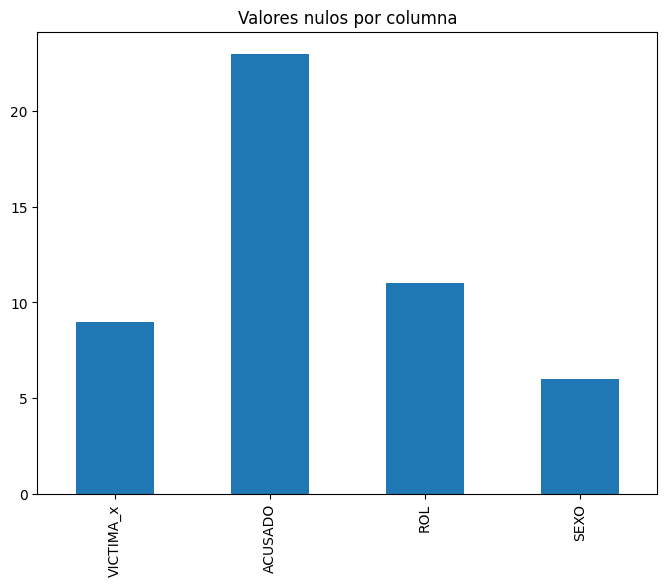

In [55]:
df = (df_fusionado.isin(['sd'])).sum()
df[df > 0].plot.bar(title='Valores nulos por columna',figsize=(8,6))

<h1> <center> Solucion para llegar a los KPIS

se categorizara las fechas en semestres de df_fusionado que corresponde a homicidios

In [76]:
df_hechos=df_fusionado
df_hechos

,ID,N_VICTIMAS,FECHA_x,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,SEMESTRE,AAAA_SEMESTRE
0,2016-0001,1,2016-01-01,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,1,2016_1
1,2016-0002,1,2016-01-02,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,1,2016_1
2,2016-0003,1,2016-01-03,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,1,2016_1
3,2016-0004,1,2016-01-10,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-sd,MOTO,sd,CONDUCTOR,MASCULINO,18,1,2016_1
4,2016-0005,1,2016-01-21,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,1,2016_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2,2021_2
713,2021-0094,1,2021-12-20,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2,2021_2
714,2021-0095,1,2021-12-30,0,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2,2021_2
715,2021-0096,1,2021-12-15,10,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2,2021_2


In [77]:
df_hechos['SEMESTRE'] = df_hechos['FECHA_x'].dt.quarter.apply(lambda x: 1 if x <= 2 else 2).astype(str)

# Crear la columna 'AAAA_SEMESTRE'
df_hechos['AAAA_SEMESTRE'] = df_hechos['FECHA_x'].dt.year.astype(str) + "_" + df_hechos['SEMESTRE']



# Eliminar columnas irrelevantes
df_hechos = df_hechos.drop(columns=["SEMESTRE"])

# Renombrar columna "AAAA_SEMESTRE"
df_hechos = df_hechos.rename(columns={'AAAA_SEMESTRE': 'SEMESTRE'})
df_hechos = df_hechos.rename(columns={'FECHA_x	': 'FECHA'})
df_hechos = df_hechos.rename(columns={'VICTIMA_x	': 'VICTIMA'})
df_hechos.insert(3, 'SEMESTRE', df_hechos.pop('SEMESTRE'))

df_hechos

,ID,N_VICTIMAS,FECHA_x,SEMESTRE,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016-01-01,2016_1,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016_1,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016_1,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016_1,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-sd,MOTO,sd,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016_1,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021_2,17,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18
713,2021-0094,1,2021-12-20,2021_2,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43
714,2021-0095,1,2021-12-30,2021_2,0,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27
715,2021-0096,1,2021-12-15,2021_2,10,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60


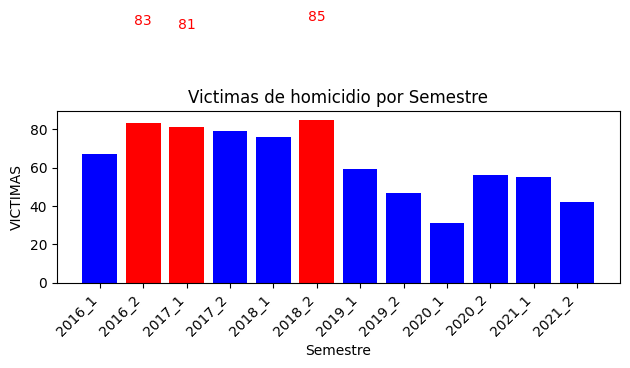

In [83]:
# Agrupar por 'AAAA_SEMESTRE' y sumar 'N_VICTIMAS'
agrupado_por_semestre = df_hechos.groupby('SEMESTRE')['N_VICTIMAS'].sum()
top3_indices = agrupado_por_semestre.nlargest(3).index

# Crear gráfico de barras con colores diferentes para los tres valores más altos
colors = ['blue' if idx not in top3_indices else 'red' for idx in agrupado_por_semestre.index]
plt.bar(agrupado_por_semestre.index, agrupado_por_semestre.values, color=colors)

plt.xlabel('Semestre')
plt.ylabel('VICTIMAS')
plt.title('Victimas de homicidio por Semestre')

# Etiquetar los tres valores más altos
for idx in top3_indices:
    plt.text(idx, agrupado_por_semestre[idx] + 50, str(agrupado_por_semestre[idx]), ha='center', va='bottom', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1> <center> KP1

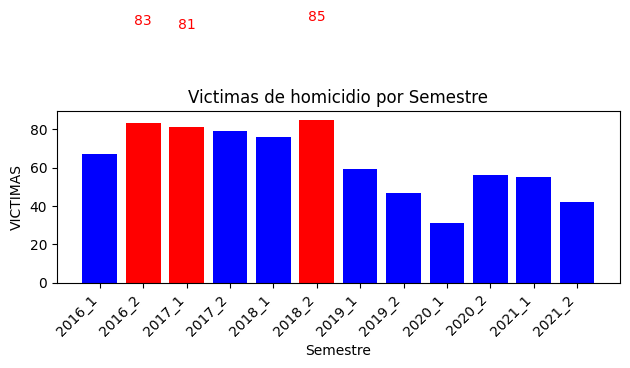